In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\KarthiganeshD\AppData\Local\Temp\ipykernel_26616\395453938.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
popdata = pd.read_csv('population.csv')
print(popdata)

    Year  Indiapop
0   1970        34
1   1975        45
2   1980        56
3   1985        64
4   1990        73
5   1995        83
6   2000        85
7   2005        95
8   2010       109
9   2015       114
10  2020       134


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [4]:
X = popdata['Year'].to_numpy()
y = popdata['Indiapop'].to_numpy()
print(X)
print(y)

[1970 1975 1980 1985 1990 1995 2000 2005 2010 2015 2020]
[ 34  45  56  64  73  83  85  95 109 114 134]


In [5]:
X=np.array(X).reshape(-1,1)

In [6]:
C=1.0
svc = svm.SVC(kernel = 'linear', C = C).fit(X, y)
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C=1). fit(X, y)
poly_svc = svm.SVC(kernel = 'poly', degree = 3, C = 1). fit(X, y)

In [7]:
h=1.0
x_min, x_max = X[:,-1].min() - 1, X[:,-1].max() + 1
y_min, y_max = X[:,0].min() - 1, X[:,0].max() + 1
xx, yy = np.meshgrid (np.arange (x_min, x_max, h),np.arange(y_min, y_max))

In [8]:
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

ValueError: X has 2 features, but SVC is expecting 1 features as input.

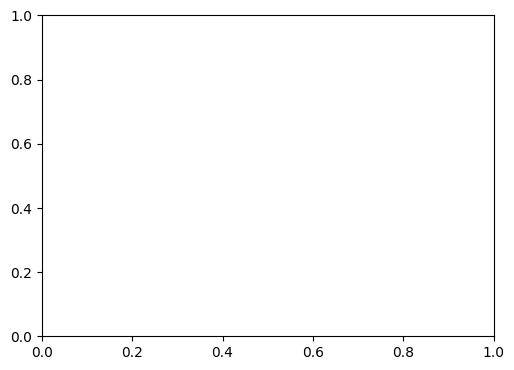

In [9]:
for i, clf in enumerate ((svc, rbf_svc, poly_svc)):
    plt.figure(figsize = (14, 10))
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    #plot also the traning points
    plt.scatter(X[:, -1], X[:, 0], c = y, cmap = plt.cm.coolwarm)   
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.xlim(xx.min(), xx.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()